In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
!pip install -r yolov5/requirements.txt

Looking in indexes: http://pip-notebook.modelarts.com:8888/repository/pypi/simple/

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="AramRqAQOQpASqwPpoWG")
project = rf.workspace("fruit-ripening").project("banana-ripening-process")
dataset = project.version(2).download("yolov5")

Looking in indexes: http://pip-notebook.modelarts.com:8888/repository/pypi/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.5/145.5 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for glob2: filename=glob2-0.7-py2.py3-none-any.whl size=9302 sha256=17b72b255886094980d4c6f10859215d69dda6a0d5f57dd54185702d3c85a88b
  Stored in directory: /home/ma-user/.cache/pip/wheels/25/24/a5/d1b5c76819f5b5f3f9ddfb639c951bca430fc5b856f94882a8
  Create

Extracting Dataset Version Zip to Banana-Ripening-Process-2 in yolov5pytorch:: 100%|██████████| 36160/36160 [02:40<00:00, 224.95it/s]


In [7]:
!pip3 install --upgrade requests

Looking in indexes: http://pip-notebook.modelarts.com:8888/repository/pypi/simple/

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [12]:
!python3 yolov5/train.py --img 640 --batch 16 --epochs 20 --data yolov5/Banana-Ripening-Process-2/data.yaml --weights yolov5l.pt

train: weights=yolov5l.pt, cfg=, data=yolov5/Banana-Ripening-Process-2/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (offline), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 v6.2-249-gff6e6e3 Python-3.7.10 torch-1.8.0 CUDA:0 (Tesla V100-SXM2-16GB, 16160MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, 

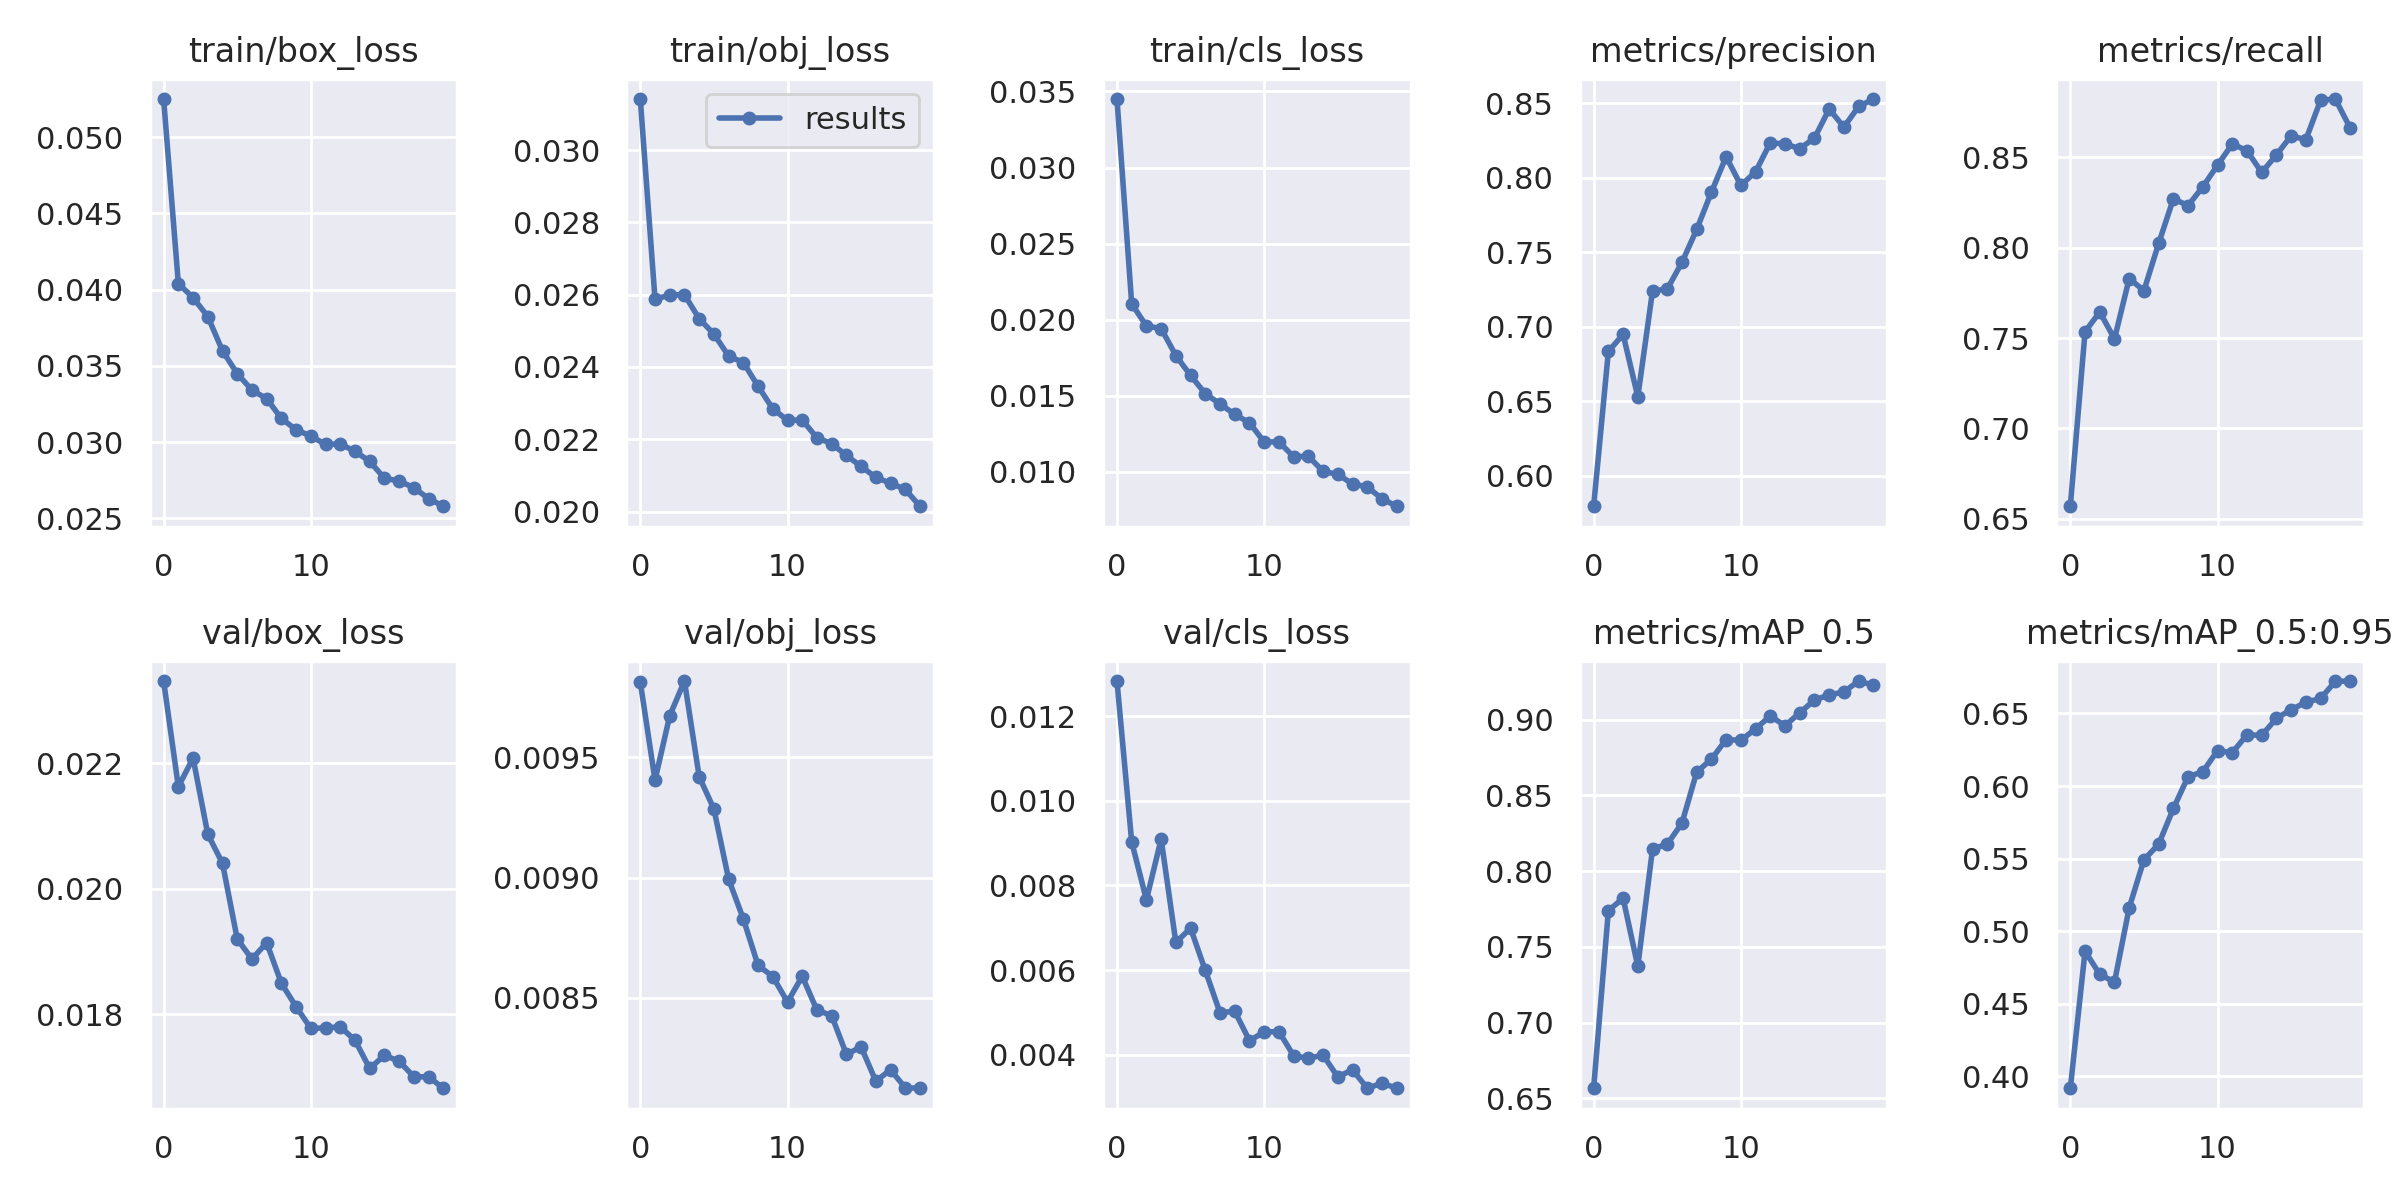

In [13]:
from IPython.display import Image
Image(filename='yolov5/runs/train/exp4/results.png')

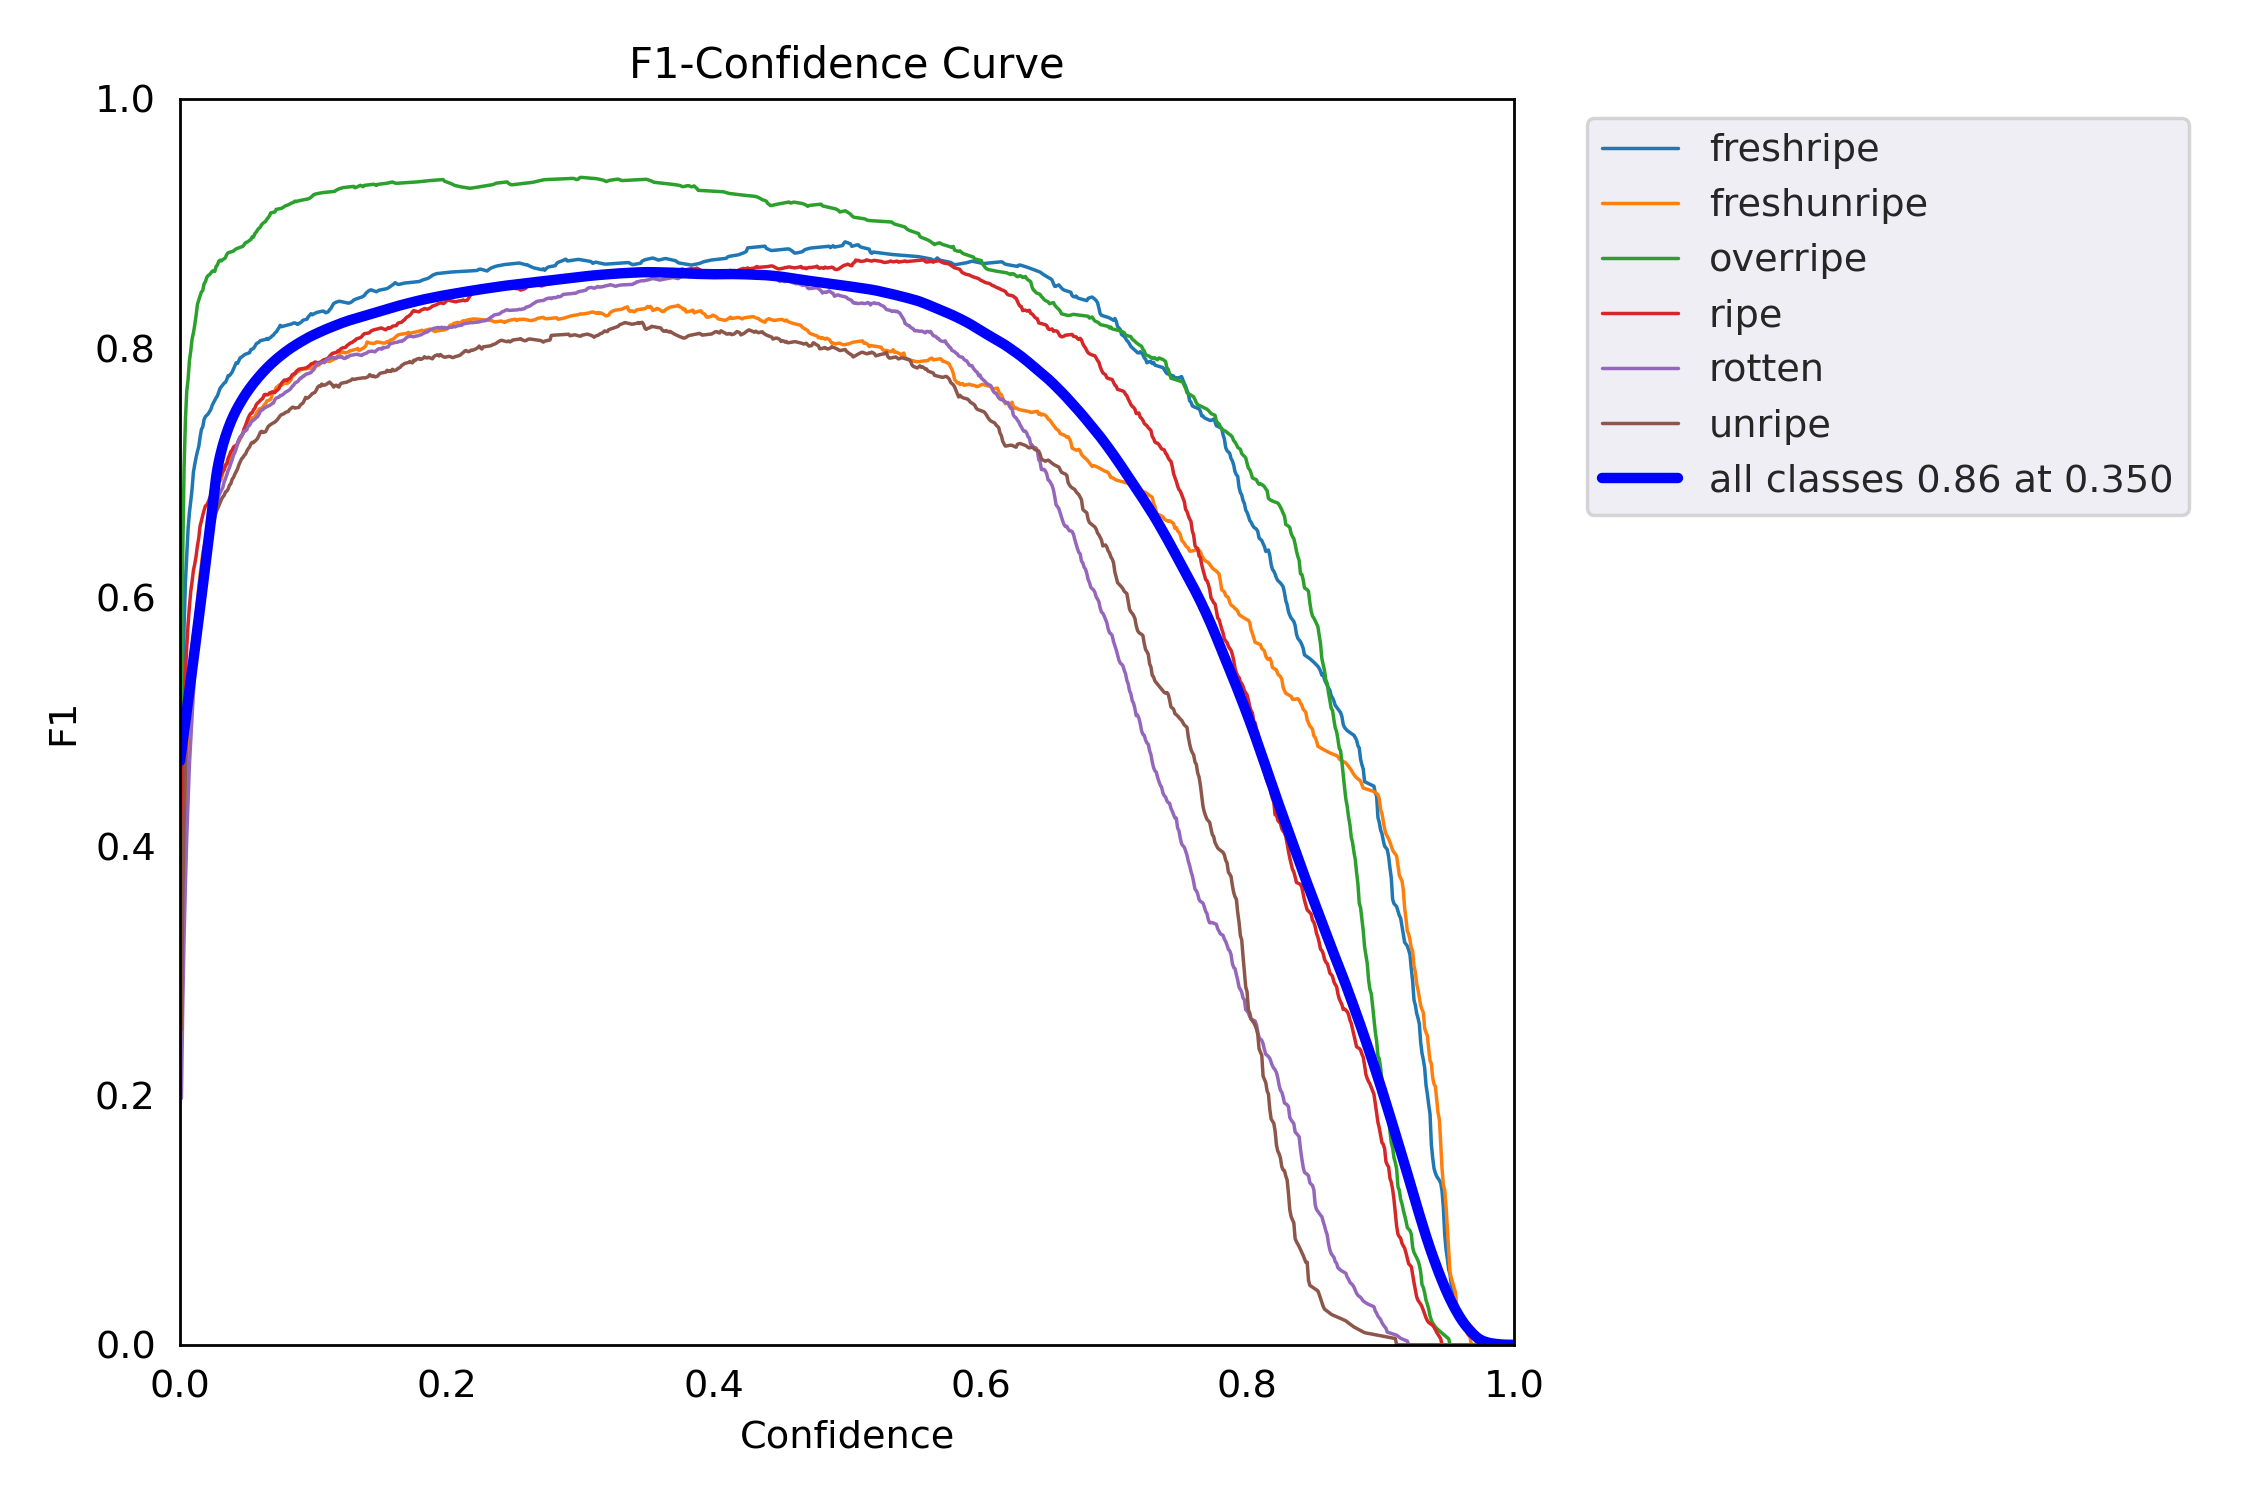

In [15]:
from IPython.display import Image
Image(filename='yolov5/runs/train/exp4/F1_curve.png')

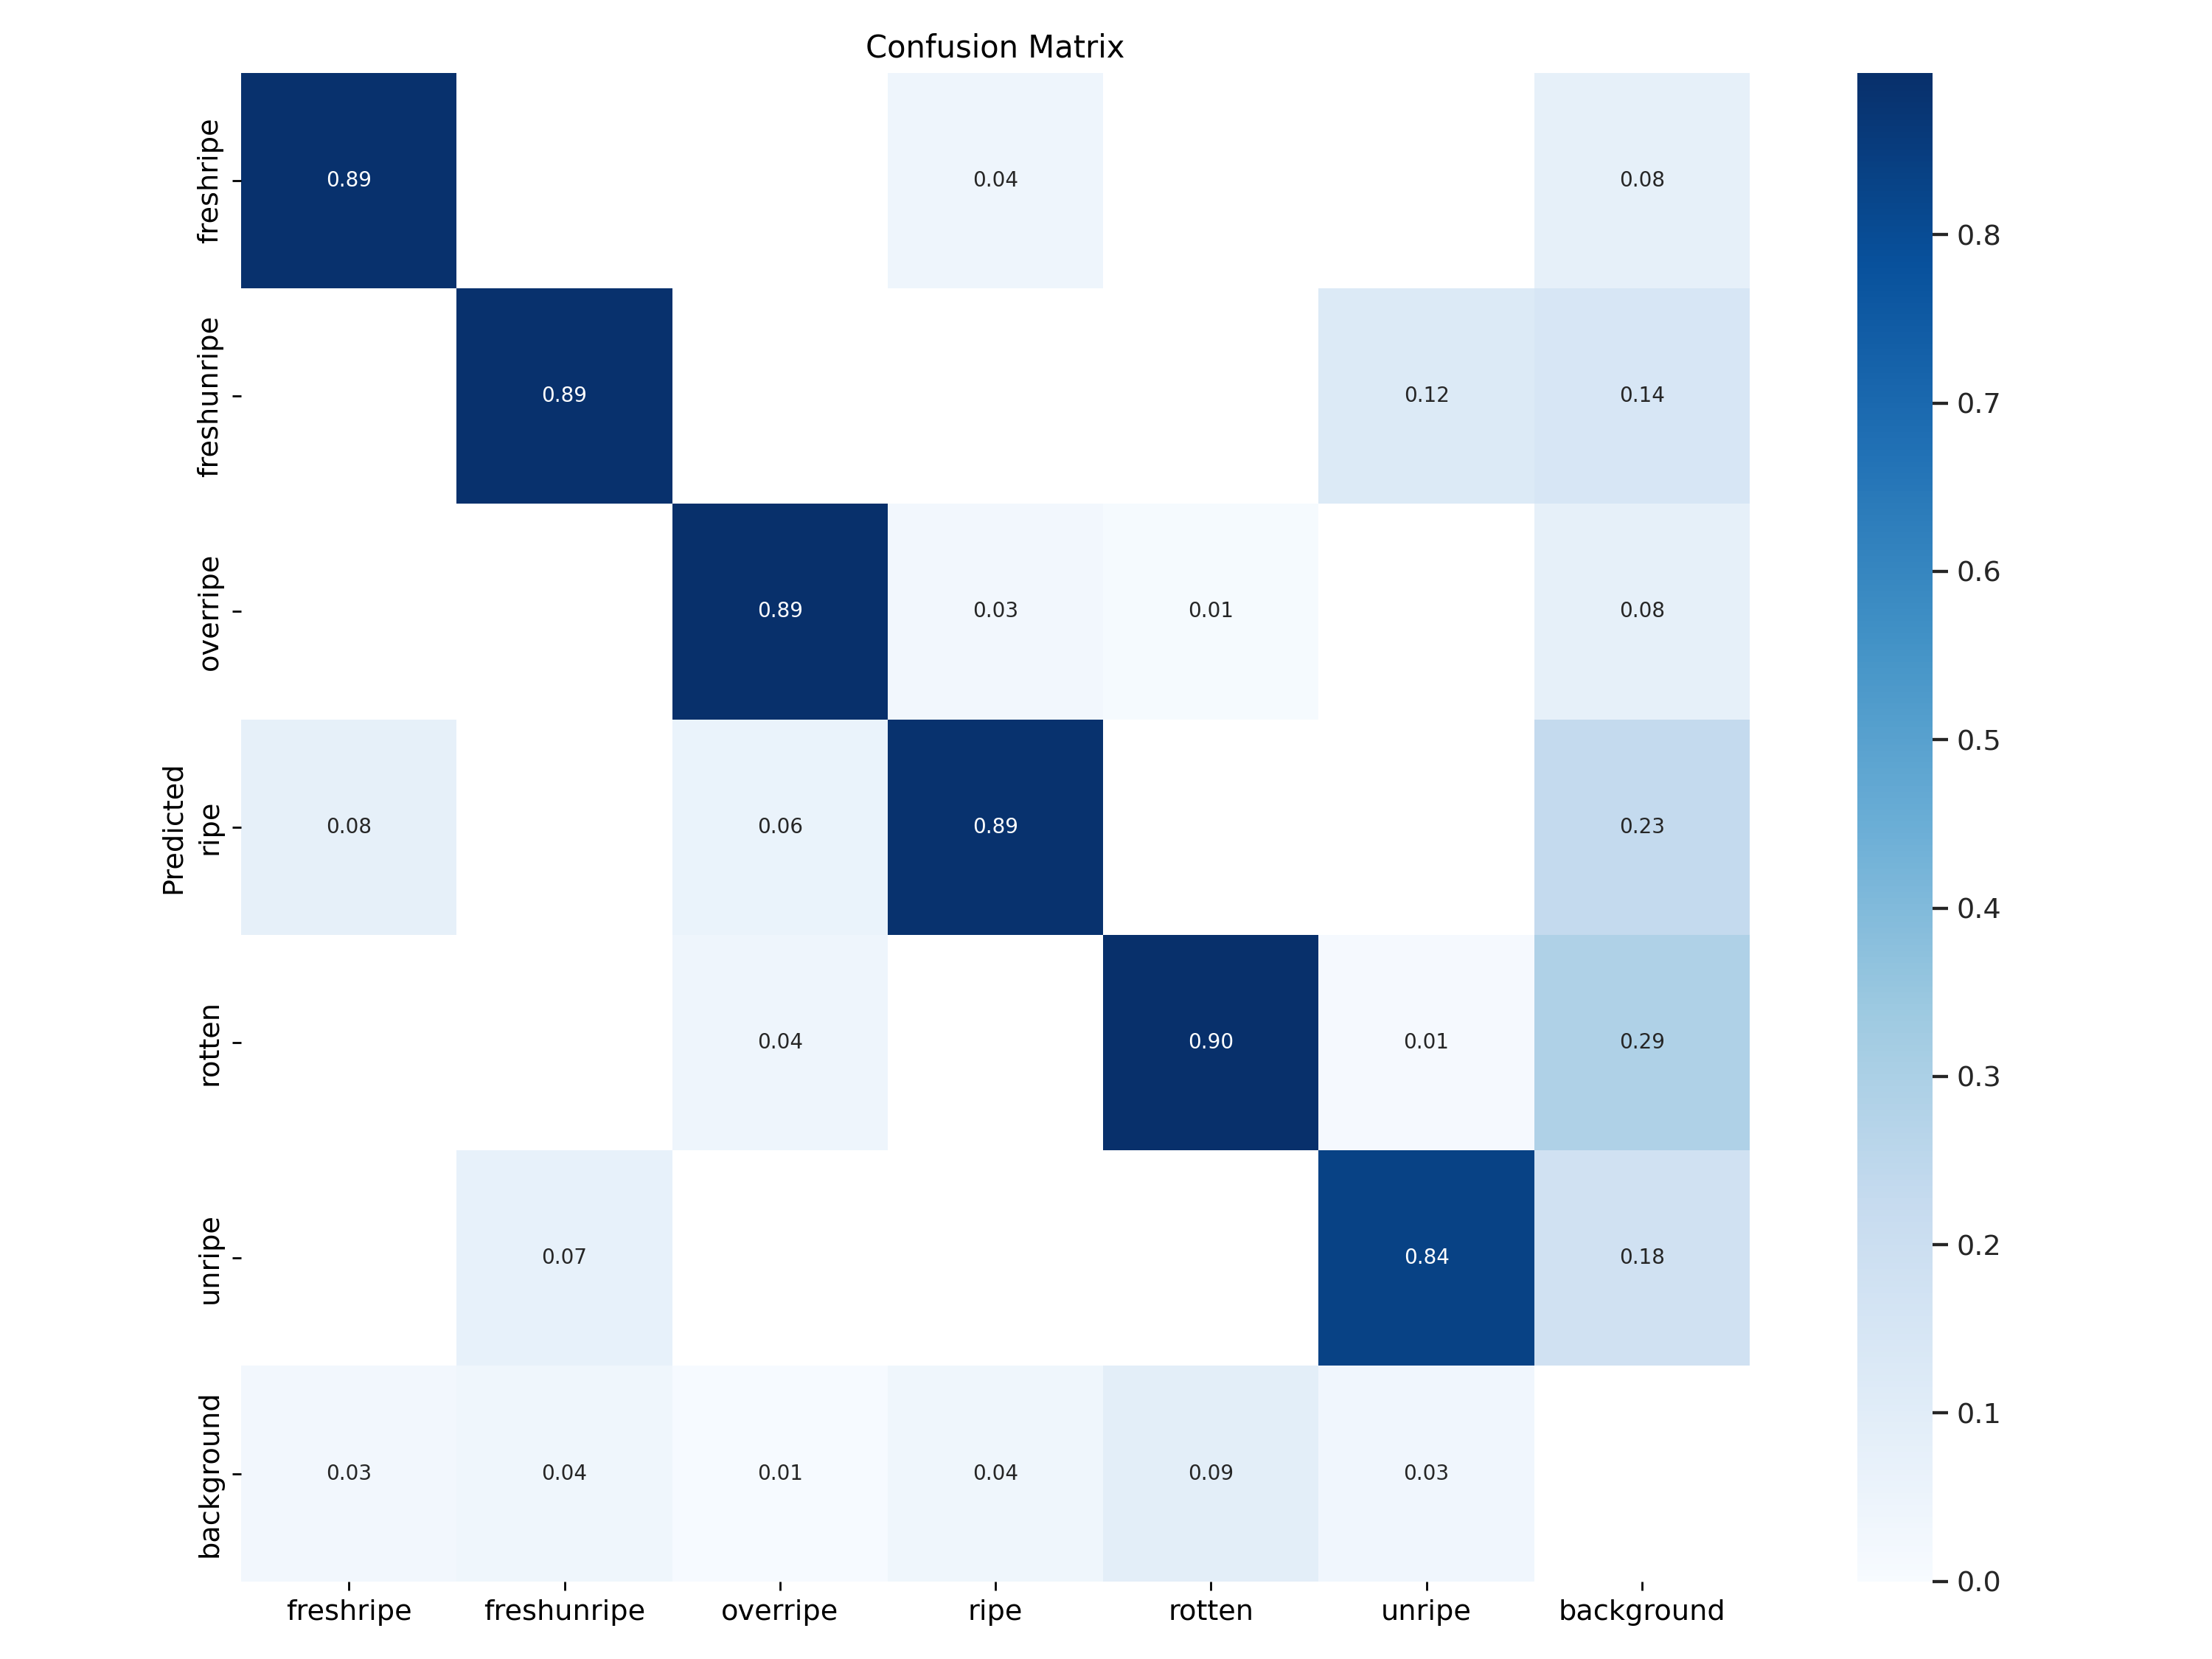

In [16]:
from IPython.display import Image
Image(filename='yolov5/runs/train/exp4/confusion_matrix.png')

In [97]:
!python yolov5/detect.py --weights yolov5/runs/train/exp4/weights/best.pt --img 640 --conf 0.7 --source pisang16.jpg

detect: weights=['yolov5/runs/train/exp4/weights/best.pt'], source=pisang16.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.7, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-249-gff6e6e3 Python-3.7.10 torch-1.8.0 CUDA:0 (Tesla V100-SXM2-16GB, 16160MiB)

Fusing layers... 
Model summary: 267 layers, 46135203 parameters, 0 gradients, 107.7 GFLOPs
image 1/1 /home/ma-user/work/pisang16.jpg: 640x640 4 unripes, 14.4ms
Speed: 0.4ms pre-process, 14.4ms inference, 1.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp28


In [99]:

from PIL import Image 
import PIL 
  

im1 = Image.open(r"yolov5/runs/detect/exp28/pisang16.jpg") 
  

im1 = im1.save("detected-pisang16.jpg")

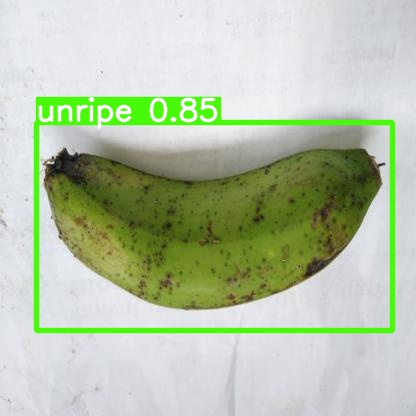

In [101]:
Image(filename='yolov5/runs/detect/exp26/pisang14.jpg')